## Admissions Execrcise - Yotam Vaknin

### Question 1

During my undergraduate studies I took courses in Set theory, Number theory, Linear algebra, Probability, Real Analysis and Complex Analysis. And although Set theory was my absolute favorite course, and Complex Analysis results in some of the most beautify theorems I have seen, I am still most fascinated by Real Analysis. 

Since I major in physics, Analysis is my everyday toolbox. Concepts like gradient and divergence, that once felt almost unintelligible, are now both intuitive and endlessly useful. As an undergrad physicist you are trained to describe problems with differential equations, and this new way of thinking initially excited me to no end.

Real analysis can be and is used in optimization problems. The gradient of a function can be used to find a minimum of a set of parameters, using simple algorithms like gradient descent. But analysis provides a wider set of tools that can be applied to optimization problem, like modeling complex optimization problems by an already solved system.

As an example, we once needed to numerically calculate a solution to Laplace's equation for a Paul trap experiment (An electric structure that 'traps' charged particles). This can be thought of as an optimization problem. Our method of finding its solution was to model the system with a random initial conditions and apply the heat equation. Running this system numerically for a few iteration until it becomes stable results in a valid solution to Laplace's equation. 



### Question 2

Since we know $f(x+1) = x(x+2)$ we can easily see that:
$$f(x)=(x-1)(x+1)=x^2 - 1$$
and therefore:
$$ f(x)-f(x+2) = x^2 - (x+2)^2 = -4x -4$$

If we plot the function $-f(x+2)$ and strech the graph such that the $x$ axis becomes $f(x)$, we find that the initial graph is on the line $-4x-4$:

In [106]:
from matplotlib.animation import FuncAnimation
from IPython import display

NUMBER_OF_ITERATIONS = 20

def f(x): 
    return (x-1)*(x+1)

x = np.linspace(-2,2)
fig, axis = plt.subplots()
plt.close()
axis.grid()
axis.plot(x, f(x), "b--")
axis.plot(x, -f(x+2), "r--")
axis.plot(x, -4*x-4,"g--" )
tranfromed_line, = axis.plot(x, -f(x+2), "black")
x_axis, = axis.plot(x, 0*x, "black")
axis.legend(["f(x)","-f(x+2)","-4x-4"], loc="best")

def update_graph(iteration):
    tranfromed_line.set_ydata((iteration/NUMBER_OF_ITERATIONS)*f(x)-f(x+2))
    x_axis.set_ydata((iteration/NUMBER_OF_ITERATIONS)*f(x))
    
anim = FuncAnimation(fig, update_graph, 
                     frames=range(0,NUMBER_OF_ITERATION+1))
display.HTML(anim.to_html5_video())

### Question 3

Dynamic Programing is a method for solving problems that have a recursive solution, that might be computationally intensive, but the recursive calculation repeats only a small subset of the possible inputs. If there is a recursive solution to a problem, but the solution has to repeat the same calculation many times, the algorithm can run faster by saving past inputs and outputs, such that it only calculate a result for a given input once. If the recursion repeats the same steps many times, it will result in a much faster running time. 

Dynamic programing not only saves time by avoiding repeated calculations, but it might also avoid running many recursion steps multiple times unnecessarily, which in some cases is the actual problem. By saving past results, a dynamical algorithm runs every required hierarchy of recursive execution only once. This means that the required memory is not necessarily large, although it might be.

For example, a dynamical program can find the length of the shortest path between two nodes on a directed graph with no cycles and weighted edges. Assuming that the graph was topologically sorted, we can identify each node with an index $i$. We will denote the $F(i)$ as the shortest path for $i$ to the last node indexed $n$ (So $F(n)=0$). 

At every step, we will calculate $F(n-k)$ for the node $n-k$, which only depends on the result of $F(n-l)$ with $l<k$. We will identify the weight of edge $i$ of node $n-k$ that leads to node $l$ as $w^i_{n-k}$, and $l=d_{n-k}^i$. Using this notation we can write:

$$ F(n-k) = \min \left( w^i_{n-k} + F(d^i_{n-k}) \right) $$

The shortest path to the node $n-k$ is the shortest path to the node $n$ from each of the nodes connected to $n-k$ plus the weight to get to each of these nodes. At each step we get an optimal solution, and by evaluating $F(0)$ recursivly we find the length of the shortest path from $0$ to $n$.

If the path consists of $n$ nodes with $k$ edges each, this algorithm results is $n \cdot k$ evalutions. The brute force approach would result in checking every possible path, of which there are $k^n$.

### Question 4

The Answer is No. As can be seen in the graph below. This is a connected graph - there is a path from any node to any other node. In this graph, half of the nodes are MACs and half are PCs, but according to the given rules, no node can change its preference. So no strategy can ensure that for any graph with any distribution the result will be a single preference.

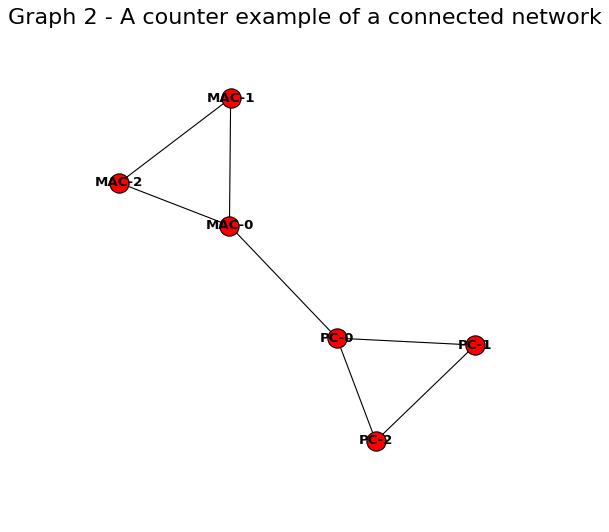

In [113]:
import networkx as nx

graph = nx.Graph()

for i in range(3):
    graph.add_node("PC-{}".format(i))
    graph.add_node("MAC-{}".format(i), color = "white")

for comp in ["PC","MAC"]:
    for idx in range(3):
        graph.add_edge("{}-{}".format(comp,idx),
                      "{}-{}".format(comp,(idx+1)%3))
graph.add_edge("PC-0","MAC-0")

nx.draw(graph, with_labels=True, font_weight='bold')
plt.title("Graph 2 - A counter example of a connected network", 
          fontsize = 20)
plt.show() # display

### Question 5
Since the ants decide simultaneously, We can look at the distance between the ants as a function of each decision: 

| Ant A\ Ant B  | Left  | Right     |
|-------------- |------ |-------    |
| Left          | 0     | +2        |
| Right         | -2    | 0         |


We would assume an ant stands constant at the origin, and a second ant with distance 10 that moves along the number line. 

The odds of the ant meeting after 5 steps is $P(steps=5) = \left(\frac{1}{4} \right)^5$. 

The ants will meet after exactly 6 steps if they haven't met after 5, which means that at some step (except the last) the distance between them hasn't change. So we get $P(steps=6) = \left( \frac{1}{4} \right)^5 \cdot \frac{1}{2} \cdot 5$.

Similarly for the 7th step, we need to take into account the possibility of moving in the opposite and then back again. Taking this possibility with the above pattern we get $P(steps = 7) = \left( \frac{1}{4} \right)^5 \left( \frac{1}{2} \right)^2 \cdot \frac{6 \cdot 5}{2} + \left( \frac{1}{4} \right)^7 \cdot 5 $. (We multiply by 5 and not 6 so to avoid the possibility of returning to the origin).

So this results in $ P(\text{meet after 7 steps}) = P(steps = 5) + P(steps = 6) + P(steps = 7) = \frac{121}{16384} = .0074$

By simulating the process we find this result matches:

In [154]:
import random

class Ant:
    def __init__(self, initial_position):
        self.position = initial_position
    
    def move(self):
        self.position += random.choice([+1, -1])

NUMBER_OF_TESTS = 168340
results = []

def run_simulation(length = 7):
    ant_a = Ant(0)
    ant_b = Ant(10)
    for _ in range(7):
        ant_a.move()
        ant_b.move()
        if ant_a.position == ant_b.position:
            return True
    return False

for _ in range(NUMBER_OF_TESTS):
    results.append(run_simulation())

number_of_meetings = sum(results)
print("Ratio is {}:{} = {}".format(number_of_meetings, NUMBER_OF_TESTS,
                                    number_of_meetings/NUMBER_OF_TESTS))

Ratio is 1280:168340 = 0.0076036592610193654
